# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


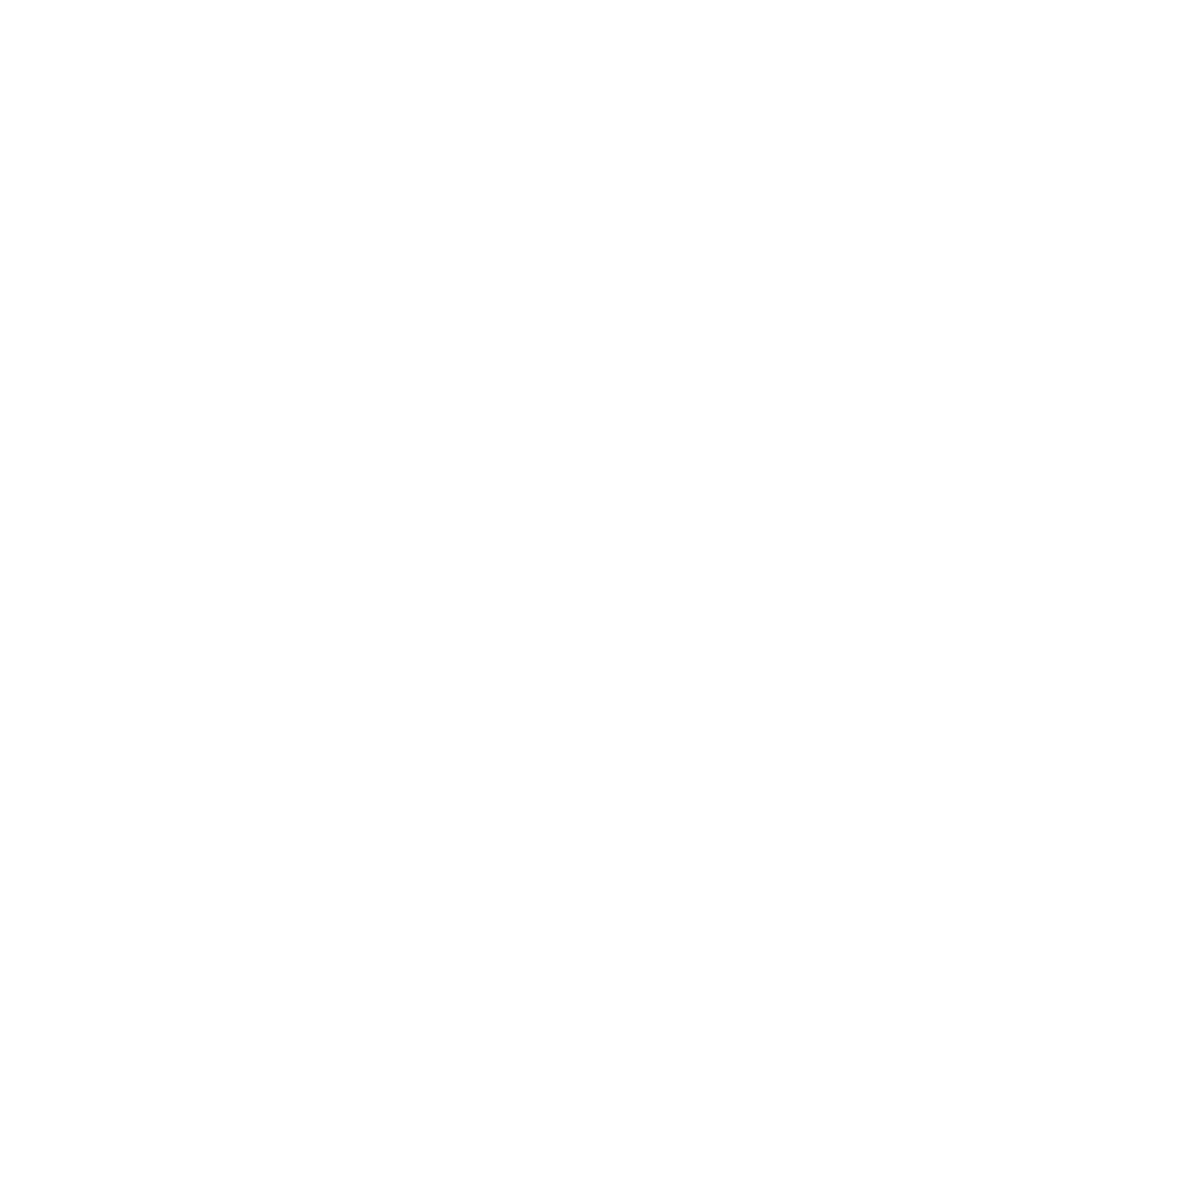

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


Change data type of `Date` column to pandas datetime

In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')

Sort by `Date`, then by `ID`

In [5]:
df = df.sort(['Date','ID'])
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
49823,USC00200228,2005-01-01,TMAX,150
49827,USC00200228,2005-01-01,TMIN,-39
35771,USC00200230,2005-01-01,TMAX,122


Change values to degree celcius

In [6]:
df['Data_Value'] = df['Data_Value']/10

Select data only from years 2005-2014

In [7]:
df2005_2014 = df[df['Date']<'2015']
df2005_2014.tail()

,ID,Date,Element,Data_Value
62708,USW00014833,2014-12-31,TMAX,-6.6
62752,USW00014853,2014-12-31,TMIN,-8.8
62753,USW00014853,2014-12-31,TMAX,-3.2
45681,USW00094889,2014-12-31,TMIN,-13.8
45683,USW00094889,2014-12-31,TMAX,-4.9


In [8]:
import numpy as np

table2005_2014 = pd.pivot_table(df2005_2014, values='Data_Value', index='Date', aggfunc=[max, min])
table2005_2014.head()

,max,min
Date,,
2005-01-01,15.6,-5.6
2005-01-02,13.9,-5.6
2005-01-03,13.3,0.0
2005-01-04,3.9,-3.9
2005-01-05,3.3,-9.4


Find and remove leap year days

In [9]:
leap_index = table2005_2014[(table2005_2014.index.month == 2) & (table2005_2014.index.day == 29)].index
table2005_2014 = table2005_2014.drop(leap_index)

Assign variables to plot

In [10]:
table2005_2014 = table2005_2014.rename(columns = {'min':'Min. Temp.', 'max':'Max. Temp.'})

ymin = table2005_2014['Min. Temp.']
ymax = table2005_2014['Max. Temp.']
x = table2005_2014.index

<IPython.core.display.Javascript object>


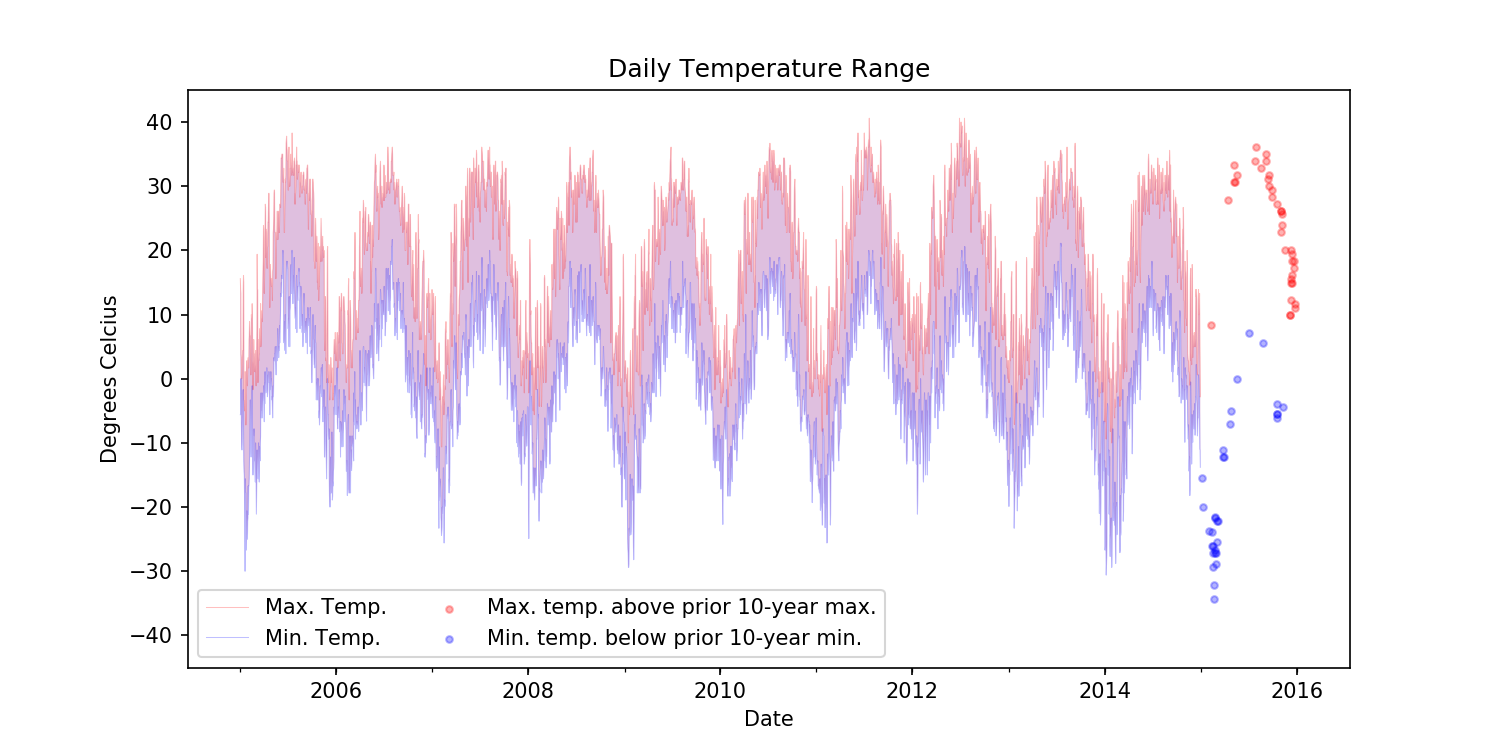

In [11]:
plt.figure(figsize=[10,5])
plt.plot(x, ymax, color='red', alpha=0.25, linewidth=0.5)
plt.plot(x, ymin, color='blue', alpha=0.25, linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Degrees Celcius')
plt.title('Daily Temperature Range')
plt.gca().fill_between(x, ymin, ymax, facecolor='purple', alpha=0.25)

Get 10-year extremes

In [12]:
table2005_2014['year'] = table2005_2014.index.year
table2005_2014['MM-DD'] = table2005_2014.index.strftime('%m-%d')
tenyear = table2005_2014.pivot_table(index=['MM-DD'], columns=['year'])
tenyear.head()

Max. Temp.                                                 Min. Temp.  \
year        2005 2006  2007 2008 2009 2010  2011  2012 2013 2014       2005   
MM-DD                                                                         
01-01       15.6  3.9  12.8  3.9 -0.5  2.2  14.4  10.0  2.8 -5.6       -5.6   
01-02       13.9  4.4  11.1  1.7  2.2  1.7  13.9   8.9 -0.6 -6.6       -5.6   
01-03       13.3  6.1  10.0 -2.2  1.7 -3.8   2.8   8.3  0.0 -6.7        0.0   
01-04        3.9  7.2  10.6  1.7  2.8 -3.2   3.9   2.8 -0.5  0.0       -3.9   
01-05        3.3  7.2  12.8  8.3  2.8 -1.7   3.3   6.7  1.7  2.8       -9.4   

                                                           
year  2006 2007  2008  2009  2010  2011  2012  2013  2014  
MM-DD                                                      
01-01 -3.9 -4.4  -5.0 -15.6 -12.8  -9.4  -2.2 -16.0 -12.8  
01-02 -1.1 -6.1 -21.0 -15.6 -16.1 -11.1  -8.3 -19.9 -26.7  
01-03  0.0 -3.9 -24.9 -12.2 -17.2 -12.2 -12.8 -17.2 -26.7  
01-04  1.7 -1.7 -20.0  -8.3 -16.1 -15.0 -12.8 -13.3 -26.1  
01-05 -6.7  1.7  -8.9 -13.8  -8.9 -13.3 -10.0 -15.0 -13.9

In [13]:
tenyear_max = tenyear['Max. Temp.']
tenyear_max['max-max'] = tenyear_max.max(axis=1)

tenyear_min = tenyear['Min. Temp.']
tenyear_min['min-min'] = tenyear_min.min(axis=1)

tenyear_maxmin = pd.concat([tenyear_max['max-max'],tenyear_min['min-min']], axis=1)
tenyear_maxmin.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,max-max,min-min
MM-DD,,
01-01,15.6,-16.0
01-02,13.9,-26.7
01-03,13.3,-26.7
01-04,10.6,-26.1
01-05,12.8,-15.0


2015 Data

In [14]:
df2015 = df[df['Date']>='2015']
table2015 = pd.pivot_table(df2015, values='Data_Value', index='Date', aggfunc=[max, min])
Index2015 = table2015.index
table2015 = table2015.rename(columns = {'min':'2015 Min. Temp.', 'max':'2015 Max. Temp.'})
table2015['MM-DD'] = table2015.index.strftime('%m-%d')
table2015 = table2015.set_index('MM-DD')
table2015.head()

,2015 Max. Temp.,2015 Min. Temp.
MM-DD,,
01-01,1.1,-13.3
01-02,3.9,-12.2
01-03,3.9,-6.7
01-04,4.4,-8.8
01-05,2.8,-15.5


In [15]:
df_combined = pd.concat([table2015, tenyear_maxmin], axis=1, join='outer')
df_combined.head()

,2015 Max. Temp.,2015 Min. Temp.,max-max,min-min
MM-DD,,,,
01-01,1.1,-13.3,15.6,-16.0
01-02,3.9,-12.2,13.9,-26.7
01-03,3.9,-6.7,13.3,-26.7
01-04,4.4,-8.8,10.6,-26.1
01-05,2.8,-15.5,12.8,-15.0


In [16]:
def get_max_extremes(row):
    if row['2015 Max. Temp.'] > row['max-max']:
        return 1
    else: 
        return 0

def get_min_extremes(row):
    if row['2015 Min. Temp.'] < row['min-min']:
        return 1
    else: 
        return 0    
    

df_combined['extreme max'] = df_combined.apply(lambda x: get_max_extremes(x), axis=1)
df_combined['extreme min'] = df_combined.apply(lambda x: get_min_extremes(x), axis=1)
df_combined.head()

,2015 Max. Temp.,2015 Min. Temp.,max-max,min-min,extreme max,extreme min
MM-DD,,,,,,
01-01,1.1,-13.3,15.6,-16.0,0,0
01-02,3.9,-12.2,13.9,-26.7,0,0
01-03,3.9,-6.7,13.3,-26.7,0,0
01-04,4.4,-8.8,10.6,-26.1,0,0
01-05,2.8,-15.5,12.8,-15.0,0,1


In [17]:
df_combined.index = Index2015
df_combined.head()

,2015 Max. Temp.,2015 Min. Temp.,max-max,min-min,extreme max,extreme min
Date,,,,,,
2015-01-01,1.1,-13.3,15.6,-16.0,0,0
2015-01-02,3.9,-12.2,13.9,-26.7,0,0
2015-01-03,3.9,-6.7,13.3,-26.7,0,0
2015-01-04,4.4,-8.8,10.6,-26.1,0,0
2015-01-05,2.8,-15.5,12.8,-15.0,0,1


In [18]:
df_max_extremes = df_combined[df_combined['extreme max']==1]
df_max_extremes = df_max_extremes.rename(columns = {'2015 Min. Temp.':'Min. temp. below prior 10-year min.', '2015 Max. Temp.':'Max. temp. above prior 10-year max.'})

df_min_extremes = df_combined[df_combined['extreme min']==1]
df_min_extremes = df_min_extremes.rename(columns = {'2015 Min. Temp.':'Min. temp. below prior 10-year min.', '2015 Max. Temp.':'Max. temp. above prior 10-year max.'})


In [19]:
x_min_extremes = df_min_extremes.index
x_max_extremes = df_max_extremes.index
y_min_extremes = df_min_extremes['Min. temp. below prior 10-year min.']
y_max_extremes = df_max_extremes['Max. temp. above prior 10-year max.']

In [20]:
plt.scatter(x_max_extremes, y_max_extremes, color='red', alpha=0.3, s=10)
plt.scatter(x_min_extremes, y_min_extremes, color='blue', alpha=0.3, s=10)

In [21]:
import matplotlib
ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.YearLocator())

plt.yticks(np.arange(-40, 45, step=10))

plt.ylim((-45, 45))

plt.legend(loc='lower left', ncol=2,
            borderaxespad=0.5, frameon=True)